# Executive Summary

Insert findings here.

## Background

Yammer is a social network for workplace communication similar to Slack. On 9-2-2014 it was identified that user engagement, measured by weekly active users, has dropped precipitously since the end of July 2014.

## Problem

1. What cause the suddent drop in user engagement?
2. Based on my observations of the data, what recommendations would I make to the organization.

## Question

1. How is user engagement measured?

## Data

__Users__ - This table includes one row per user, with descriptive information about that user’s account.
* user_id - A unique ID per user. Can be joined to user_id in either of the other tables.
* created_at - The time the user was created (first signed up)
* state - state of the user (active or pending)
* activated_at -  The time the user was activated, if they are active
* company_id -  The ID of the user's company
* language - The chosen language of the user

__Events__ - This table includes one row per event, where an event is an action that a user has taken on
Yammer. These events include login events, messaging events, search events, events logged
as users progress through a signup funnel, events around received emails.
* user_id - The ID of the user logging the event. Can be joined to user_id in either of the other tables.
* occurred_at - The time the event occurred.
* event_type - The general event type. There are two values in this dataset: "signup_flow",which refers to anything occurring during the process of a user'sauthentication, and "engagement", which refers to general product usage after the user has signed up for the first time.
* event_name - The specific action the user took. Possible values include:

    1. create_user:User is added to Yammer's database during signup process

    2. enter_email:User begins the signup process by entering her email address

    3. enter_info:User enters her name and personal information during signup process

    4. complete_signup:User completes the entire signup/authentication process

    5. home_page:User loads the home page

    6. like_message:User likes another user’s message
    
    7. login: User logs into Yammer

    8. search_autocomplete: User selects a search result from the autocomplete list

    9. search_run:User runs a search query and is taken to the search results page
    
    10. search_click_result_X:User clicks search result X on the results page, where X is a number from 1 through 

    11. send_message:User posts a message

    12. view_inbox:User views messages in her inbox
    
__Email Events__ - This table contains events specific to the sending of emails. It is similar in structure to the events table above.

* user_id - The ID of the user to whom the event relates. Can be joined to user_id in either of the other tables. 
* occurred_at - The time the event occurred.
* action - The name of the event that occurred. "sent_weekly_digest" means that the user was delivered a digest email showing relevant conversations from the previous day. "email_open" means that the user opened the email. "email_clickthrough" means that the user clicked a link in the email.



# Data Preparation

### Import Packages and Load Data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from datetime import date

In [32]:
# Load Data

user = pd.read_csv("yammer_users.csv")

In [33]:
user.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [34]:
event = pd.read_csv("yammer_events_1.csv", index_col=0)

In [35]:
event.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [36]:
em_event = pd.read_csv("yammer_events_2.csv", index_col=0)

In [37]:
em_event.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
170416,7754.0,2014-06-26 08:41:54,engagement,like_message,United States,amazon fire phone,1.0
170417,7754.0,2014-06-26 08:42:24,engagement,send_message,United States,amazon fire phone,1.0
170418,7754.0,2014-06-26 08:42:37,engagement,home_page,United States,amazon fire phone,1.0
170419,7754.0,2014-06-26 08:43:06,engagement,send_message,United States,amazon fire phone,1.0
170420,7754.0,2014-06-26 08:43:43,engagement,home_page,United States,amazon fire phone,1.0


So it appears that there are two separate spreadsheets for event. Will need to concatonnate.

In [38]:
events_all = pd.concat([event, em_event])

In [39]:
events_all.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [40]:
email = pd.read_csv("yammer_emails.csv", index_col=0)

In [41]:
email.head()

,occurred_at,action,user_type
user_id,,,
0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0


### Merge data together

Now that the data has all been successfully loaded we need to join the datasets together to further enable our data cleaning and EDA.

In [42]:
# Compile a list of dataframes I want to merge

dataframes = [user, events_all, email]

In [43]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id'],
                                            how='inner'), dataframes)

In [44]:
df_merged.head()

,user_id,created_at,company_id,language,activated_at,state,occurred_at_x,event_type,event_name,location,device,user_type_x,occurred_at_y,action,user_type_y
0,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-06 09:30:00,sent_weekly_digest,3.0
1,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-13 09:30:00,sent_weekly_digest,3.0
2,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-13 09:30:34,email_open,3.0
3,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-13 09:31:07,email_clickthrough,3.0
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-20 09:30:00,sent_weekly_digest,3.0


There are some redundant and confusing variable names as a result of the merge. Let's fix those now.

In [45]:
df = df_merged.rename(columns={"occurred_at_x": "online_event", "user_type_x": "event_usertype","occurred_at_y": "email_event", "user_type_y":"email_usertype"})

We effectively cleaned up the column names now let's get a real look at the data.

### Inspect Data

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6270667 entries, 0 to 6270666
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         float64
 1   created_at      object 
 2   company_id      float64
 3   language        object 
 4   activated_at    object 
 5   state           object 
 6   online_event    object 
 7   event_type      object 
 8   event_name      object 
 9   location        object 
 10  device          object 
 11  event_usertype  float64
 12  email_event     object 
 13  action          object 
 14  email_usertype  float64
dtypes: float64(4), object(11)
memory usage: 765.5+ MB


We may have some redundant columns that I did not address in the merge. Let's investigate.

In [47]:
df.head()

,user_id,created_at,company_id,language,activated_at,state,online_event,event_type,event_name,location,device,event_usertype,email_event,action,email_usertype
0,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-06 09:30:00,sent_weekly_digest,3.0
1,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-13 09:30:00,sent_weekly_digest,3.0
2,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-13 09:30:34,email_open,3.0
3,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-13 09:31:07,email_clickthrough,3.0
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-20 09:30:00,sent_weekly_digest,3.0


In [48]:
#df.where(df.values==df2.values).notna()

In [49]:
df['same_usertypes'] = df.apply(lambda x: x['event_usertype'] == x['email_usertype'], axis=1)

In [50]:
df.head()

,user_id,created_at,company_id,language,activated_at,state,online_event,event_type,event_name,location,device,event_usertype,email_event,action,email_usertype,same_usertypes
0,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-06 09:30:00,sent_weekly_digest,3.0,True
1,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-13 09:30:00,sent_weekly_digest,3.0,True
2,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-13 09:30:34,email_open,3.0,True
3,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-13 09:31:07,email_clickthrough,3.0,True
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-20 09:30:00,sent_weekly_digest,3.0,True


Ok so user types are identical. Let's drop unnecessary columns and rename `event_usertpe` to plain `usertype`.

In [51]:
df = df.drop(['email_usertype', 'same_usertypes'], axis=1)


In [52]:
df.head()

,user_id,created_at,company_id,language,activated_at,state,online_event,event_type,event_name,location,device,event_usertype,email_event,action
0,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-06 09:30:00,sent_weekly_digest
1,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-13 09:30:00,sent_weekly_digest
2,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-13 09:30:34,email_open
3,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-13 09:31:07,email_clickthrough
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-20 09:30:00,sent_weekly_digest


In [53]:
df = df.rename(columns={"event_usertype": "usertype"})

In [54]:
df.head()

,user_id,created_at,company_id,language,activated_at,state,online_event,event_type,event_name,location,device,usertype,email_event,action
0,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-06 09:30:00,sent_weekly_digest
1,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-13 09:30:00,sent_weekly_digest
2,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-13 09:30:34,email_open
3,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-13 09:31:07,email_clickthrough
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,2014-05-20 09:30:00,sent_weekly_digest


Ok, we have removed unnecessary duplicate columns and renamed others to be more descriptive. Now let's address datetime objects.

### Converting objects to datetime

In [55]:
df['created_at']= pd.to_datetime(df['created_at'], errors='coerce', utc = True).dt.date
df['activated_at']= pd.to_datetime(df['activated_at'], errors='coerce', utc = True).dt.date
df['online_event']= pd.to_datetime(df['online_event'], errors='coerce', utc = True).dt.date
df['email_event']= pd.to_datetime(df['email_event'], errors='coerce', utc = True).dt.date

In [57]:
df.head()

,user_id,created_at,company_id,language,activated_at,state,online_event,event_type,event_name,location,device,usertype,email_event,action
0,4.0,2013-01-01,5110.0,indian,2013-01-01,active,2014-05-13,engagement,login,India,lenovo thinkpad,3.0,2014-05-06,sent_weekly_digest
1,4.0,2013-01-01,5110.0,indian,2013-01-01,active,2014-05-13,engagement,login,India,lenovo thinkpad,3.0,2014-05-13,sent_weekly_digest
2,4.0,2013-01-01,5110.0,indian,2013-01-01,active,2014-05-13,engagement,login,India,lenovo thinkpad,3.0,2014-05-13,email_open
3,4.0,2013-01-01,5110.0,indian,2013-01-01,active,2014-05-13,engagement,login,India,lenovo thinkpad,3.0,2014-05-13,email_clickthrough
4,4.0,2013-01-01,5110.0,indian,2013-01-01,active,2014-05-13,engagement,login,India,lenovo thinkpad,3.0,2014-05-20,sent_weekly_digest


All of the dates have been converted to the appropriate `y/m/d` format. I did not feel it was necessary to keep the hourly resolution given the problem we are trying to address.

### Subset data by time period of interest

We are interested in what cause user engagement to decline in the beginning of August 2014. Given the graph of engagement, I make the assumption that user engagement begins to decline in mid-July 2014. Subset data from July 2014 onward.

In [58]:
df_timesub = df[df['created_at'] > pd.Timestamp(date(2014,7,1))]

In [59]:
df_timesub = df[df['activated_at'] > pd.Timestamp(date(2014,7,1))]
df_timesub = df[df['online_event'] > pd.Timestamp(date(2014,7,1))]
df_timesub = df[df['email_event'] > pd.Timestamp(date(2014,7,1))]

In [60]:
df_timesub.head()

,user_id,created_at,company_id,language,activated_at,state,online_event,event_type,event_name,location,device,usertype,email_event,action
17,4.0,2013-01-01,5110.0,indian,2013-01-01,active,2014-05-13,engagement,login,India,lenovo thinkpad,3.0,2014-07-08,sent_weekly_digest
18,4.0,2013-01-01,5110.0,indian,2013-01-01,active,2014-05-13,engagement,login,India,lenovo thinkpad,3.0,2014-07-15,sent_weekly_digest
19,4.0,2013-01-01,5110.0,indian,2013-01-01,active,2014-05-13,engagement,login,India,lenovo thinkpad,3.0,2014-07-22,sent_weekly_digest
20,4.0,2013-01-01,5110.0,indian,2013-01-01,active,2014-05-13,engagement,login,India,lenovo thinkpad,3.0,2014-07-29,sent_weekly_digest
21,4.0,2013-01-01,5110.0,indian,2013-01-01,active,2014-05-13,engagement,login,India,lenovo thinkpad,3.0,2014-08-05,sent_weekly_digest


Every time event has been filtered by 2014-07-01. However this may not be the best approach. May be good to isolate these time variables and look at them separately as `created_at` and `activated_at` dropped as I filtered the four data columns. Continue analysis on original dataframe without time filter applied.

In [61]:
df.describe()

,user_id,company_id,usertype
count,6.270667e+06,6.270667e+06,6.187879e+06
mean,7.856197e+03,4.444858e+03,1.454502e+00
std,4.813947e+03,4.325669e+03,7.289777e-01
min,4.000000e+00,1.000000e+00,1.000000e+00
25%,3.559000e+03,6.100000e+01,1.000000e+00
50%,7.885000e+03,3.535000e+03,1.000000e+00
75%,1.189300e+04,8.037000e+03,2.000000e+00
max,1.900100e+04,1.319700e+04,3.000000e+00


#### Explore Missing Values

In [62]:
df.isna().mean(axis=0)

user_id         0.000000
created_at      0.000000
company_id      0.000000
language        0.000000
activated_at    0.000000
state           0.000000
online_event    0.000000
event_type      0.000000
event_name      0.000000
location        0.000000
device          0.000000
usertype        0.013202
email_event     0.000000
action          0.000000
dtype: float64

This is good. Not a lot of missing data. The only missing data is in `usertype` and only 1.3% is missing. Let's remove the missing `usertype` data. 

In [63]:
df = df.dropna(subset=['usertype']) #only removing NAs in usertype column

#### Explore Value Counts

In [64]:
df.company_id.value_counts() 

1.0       354893
2.0       200158
3.0       125361
4.0        75201
6.0        59045
           ...  
6653.0         3
2786.0         3
6863.0         3
3386.0         3
9907.0         3
Name: company_id, Length: 4282, dtype: int64

Ok. So lots of different companies. Important to know. 

In [65]:
df.language.value_counts()

english      2947949
spanish       580304
french        538668
japanese      449217
german        409394
chinese       264862
arabic        224532
russian       194134
indian        172787
portugese     169474
italian       146005
korean         90553
Name: language, dtype: int64

The top 3 most predominant languages of Yammer users are English, Spanish, and French. Is there a specific language of users that declined during the period of interest? Important to start targeting where the decline may have happened so we can understand why.

In [66]:
df.state.value_counts()

active    6187879
Name: state, dtype: int64

So all users are active. We can drop this column if all values are similar and assume every user in the dataset is an active user.

In [67]:
df = df.drop(['state'], axis=1)

In [68]:
df.head()

,user_id,created_at,company_id,language,activated_at,online_event,event_type,event_name,location,device,usertype,email_event,action
0,4.0,2013-01-01,5110.0,indian,2013-01-01,2014-05-13,engagement,login,India,lenovo thinkpad,3.0,2014-05-06,sent_weekly_digest
1,4.0,2013-01-01,5110.0,indian,2013-01-01,2014-05-13,engagement,login,India,lenovo thinkpad,3.0,2014-05-13,sent_weekly_digest
2,4.0,2013-01-01,5110.0,indian,2013-01-01,2014-05-13,engagement,login,India,lenovo thinkpad,3.0,2014-05-13,email_open
3,4.0,2013-01-01,5110.0,indian,2013-01-01,2014-05-13,engagement,login,India,lenovo thinkpad,3.0,2014-05-13,email_clickthrough
4,4.0,2013-01-01,5110.0,indian,2013-01-01,2014-05-13,engagement,login,India,lenovo thinkpad,3.0,2014-05-20,sent_weekly_digest


In [69]:
df.event_type.value_counts()

engagement     6160283
signup_flow      27596
Name: event_type, dtype: int64

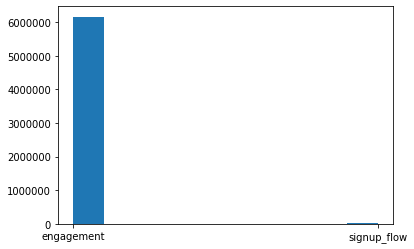

In [70]:
plt.hist(df.event_type)
plt.show()

Very little `signup_flow` compared to engagement. Variable `signup_flow`, "refers to anything occurring during the process of a user'sauthentication". So this seems to be relevant to new users. Since we are only interested in existing engagement we can drop `signup_flow`.

In [71]:
# Get names of indexes for which column event_type has value signup_flow
indexNames = df[ df['event_type'] == 'signup_flow' ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [73]:
df.event_name.value_counts()

home_page                 1810548
like_message              1144983
view_inbox                1078214
login                      722587
send_message               641374
search_autocomplete        333527
search_run                 242572
search_click_result_2       28532
search_click_result_1       27059
search_click_result_4       24063
search_click_result_3       21660
search_click_result_5       18271
search_click_result_6       15239
search_click_result_9       14838
search_click_result_8       13693
search_click_result_7       13473
search_click_result_10       9650
Name: event_name, dtype: int64

Home_page and like_message are the most common events. 

In [74]:
df.location.value_counts()

United States           1694999
Japan                    474906
Germany                  422350
France                   326306
United Kingdom           297551
Russia                   226974
Brazil                   217271
Italy                    201167
Mexico                   182304
India                    174922
Canada                   168566
Australia                131438
Korea                    130583
Indonesia                114320
Spain                    102097
Poland                    80439
Netherlands               76512
Saudi Arabia              74151
Taiwan                    70826
Switzerland               65067
Sweden                    64207
Iran                      58035
Austria                   54156
Belgium                   53723
Malaysia                  52417
Egypt                     51923
United Arab Emirates      47591
Venezuela                 40692
Israel                    38564
Norway                    37091
Finland                   35992
Turkey  

Plot top 10 countries